In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./MLC_SP23/clean_data/regression_data.csv", low_memory=False, index_col=[0])

In [2]:
df

,bbl,rs_share_diff,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,...,pop_race_div_idx_19,boro_2,boro_3,boro_4,boro_5,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1
0,1000780047,0.000000,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.450691,0,0,0,0,12.276639,0.150551,0.018246,0.035008,0.074674
1,1001350019,0.000000,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.457072,0,0,0,0,12.897523,0.096864,0.055298,0.002253,0.014341
2,1001620013,-0.050000,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.612518,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935
3,1001630024,0.187500,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0.612518,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935
4,1001630033,0.000000,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,...,0.612518,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,4001360036,1.000000,7,1924,0.0,0.0,0.0,0.0,0.0,0.0,...,0.678053,0,0,1,0,11.333896,0.222322,0.007496,0.064376,0.007321
38963,4019390011,1.000000,68,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0.374426,0,0,1,0,10.661933,0.101427,0.055693,0.150251,0.006320
38964,4049590008,0.857143,7,1930,0.0,0.0,0.0,0.0,0.0,0.0,...,0.162352,0,0,1,0,10.921956,0.648695,0.000000,0.024720,0.000000
38965,4052630021,1.000000,47,1929,0.0,2.0,0.0,0.0,0.0,0.0,...,0.651452,0,0,1,0,11.256711,0.373006,0.021625,0.033609,0.005244


In [63]:
df.columns.values.tolist()

['bbl',
 'rs_share_diff',
 'total_units_19',
 'year_built',
 'ejectment_count',
 'possession_count',
 'eviction_count',
 'aleration_count',
 'altered_lessthan5yrs',
 'altered_morethan5yrs',
 'classanet_avg',
 'enlargement_count',
 'hpd_calls_2017',
 'hpd_calls_2018',
 'hpd_calls_2019',
 'dob_calls_2017',
 'dob_calls_2018',
 'dob_calls_2019',
 'b_violations_2017',
 'b_violations_2018',
 'b_violations_2019',
 'c_violations_2017',
 'c_violations_2018',
 'c_violations_2019',
 'cases_2017',
 'cases_2018',
 'cases_2019',
 'Heat and Hot Water_2017',
 'Heat and Hot Water_2018',
 'Heat and Hot Water_2019',
 'Tenant Action_2017',
 'Tenant Action_2018',
 'Tenant Action_2019',
 'CONH_2017',
 'CONH_2018',
 'CONH_2019',
 'Tenant Action/Harrassment_2017',
 'Tenant Action/Harrassment_2018',
 'Tenant Action/Harrassment_2019',
 'hh_inc_own_med_19',
 'own_cost_mort_med_19',
 'own_burden_mort_med_19',
 'rent_contract_med_19',
 'rent_burden_med_19',
 'pop_65p_pct_19',
 'pop_rent_pct_19',
 'pop_race_white_p

In [103]:
df['total_units_19'].sum()

1229713

In [37]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

%matplotlib inline 

In [4]:
# df['total_units_19'].quantile([0.1,0.2,0.3,0.4,0.5])

In [62]:
df['total_units_19'].quantile(np.arange(0,1.05,0.05)).values

array([1.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 8.000e+00,
       8.000e+00, 9.000e+00, 1.000e+01, 1.300e+01, 1.600e+01, 1.800e+01,
       2.000e+01, 2.400e+01, 2.900e+01, 3.600e+01, 4.400e+01, 5.400e+01,
       6.800e+01, 1.000e+02, 8.764e+03])

In [5]:
df['unit_bin'] = pd.cut(df['total_units_19'], 
                          bins=df['total_units_19'].quantile(np.arange(0,1.05,0.05)).values, 
                          include_lowest=True,
                          duplicates='drop') 
df.groupby('unit_bin')['rs_sha...'].mean()

In [6]:
# df.loc[df['total_units_19'] <= 6.0, ['rs_share_diff']]

In [7]:
# df.groupby(['unit_bin'])['total_units_19','rs_share_diff'].mean()

### 1. Gradient Boosting Regressor - all buildings

In [38]:
X = df.drop(['rs_share_diff','bbl'], axis = 1)
y = df['rs_share_diff']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [42]:
# Fit model

gbr_params = {'n_estimators' : [150,200,250],
            'max_depth'    : [2,4,6],
             }

model_gb = GradientBoostingRegressor()
gr_gb = GridSearchCV(model_gb, param_grid = gbr_params, cv = 4)
fit_gb = gr_gb.fit(X_train, y_train)
print(fit_gb.best_estimator_)

GradientBoostingRegressor(max_depth=4, n_estimators=200)


In [43]:
# Test set prediction

from sklearn.metrics import mean_squared_error

y_hat_gb_test = fit_gb.predict(X_test)
rmse = mean_squared_error(y_test, y_hat_gb_test, squared=False)

print("RMSE: ", rmse)

RMSE:  0.32056297160649627


Computing partial dependence plots...


/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


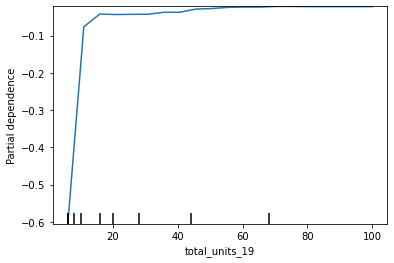

In [13]:
# Path Dependency

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

print('Computing partial dependence plots...')
features = ['total_units_19']
plot_partial_dependence(fit_gb, X_train, features,
                        n_jobs=3, grid_resolution=20)

fig = plt.gcf()

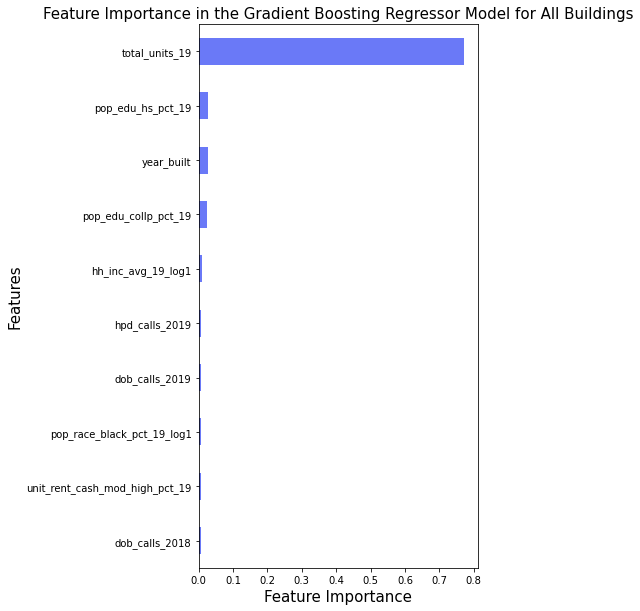

In [14]:
# Get Feature importance data using feature_importances_attribute

plt.figure(figsize=(5,10))
importances = pd.Series(fit_gb.best_estimator_.feature_importances_, X_train.columns)
importances.sort_values().tail(10).plot.barh(color = '#6a79f7')
plt.title('Feature Importance in the Gradient Boosting Regressor Model for All Buildings',fontsize=15)
plt.xlabel('Feature Importance',fontsize = 15)
plt.ylabel('Features',fontsize = 15)
plt.show()


In [45]:
# save prediction on all dataset 

y_hat_gb = fit_gb.predict(X)
df_copy = df.copy()
df_copy['preds'] = y_hat_gb
df_copy.to_csv('./MLC_SP23/clean_data/df_pred_all.csv',index = False)
df_copy

,bbl,rs_share_diff,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,...,boro_2,boro_3,boro_4,boro_5,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1,preds
0,1000780047,0.000000,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,12.276639,0.150551,0.018246,0.035008,0.074674,-0.010812
1,1001350019,0.000000,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,12.897523,0.096864,0.055298,0.002253,0.014341,-0.322672
2,1001620013,-0.050000,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935,-0.004813
3,1001630024,0.187500,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935,-0.002596
4,1001630033,0.000000,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935,-0.018858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38962,4001360036,1.000000,7,1924,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,11.333896,0.222322,0.007496,0.064376,0.007321,-0.099495
38963,4019390011,1.000000,68,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,10.661933,0.101427,0.055693,0.150251,0.006320,0.344384
38964,4049590008,0.857143,7,1930,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,10.921956,0.648695,0.000000,0.024720,0.000000,-0.006567
38965,4052630021,1.000000,47,1929,0.0,2.0,0.0,0.0,0.0,0.0,...,0,0,1,0,11.256711,0.373006,0.021625,0.033609,0.005244,0.049703


In [ ]:
# 

### 2. Gradient Boosting Regressor - buildings <= 6 units

In [46]:
df_small = df[df['total_units_19'] <= 6].reset_index(drop=True)

In [47]:
X = df_small.drop(['rs_share_diff','bbl'], axis = 1)
y = df_small['rs_share_diff']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [49]:
# Fit model

gbr_params = {'n_estimators' : [150,200,250],
            'max_depth'    : [2,4,6],
             }

model_gb = GradientBoostingRegressor()
gr_gb = GridSearchCV(model_gb, param_grid = gbr_params, cv = 4)
fit_gb_small = gr_gb.fit(X_train, y_train)
print(fit_gb.best_estimator_)

GradientBoostingRegressor(max_depth=4, n_estimators=200)


In [50]:
# Test set prediction

from sklearn.metrics import mean_squared_error

y_hat_gb_test_small = fit_gb_small.predict(X_test)
rmse_small = mean_squared_error(y_test, y_hat_gb_test_small, squared=False)

print("RMSE_small: ", rmse_small)

RMSE_small:  0.3203088565925936


/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


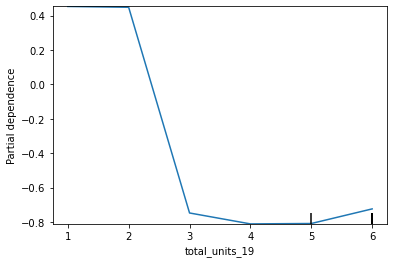

In [51]:
# Path Dependency

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

features = ['total_units_19']
plot_partial_dependence(fit_gb_small, X_train, features,
                        n_jobs=3, grid_resolution=20)

fig = plt.gcf()


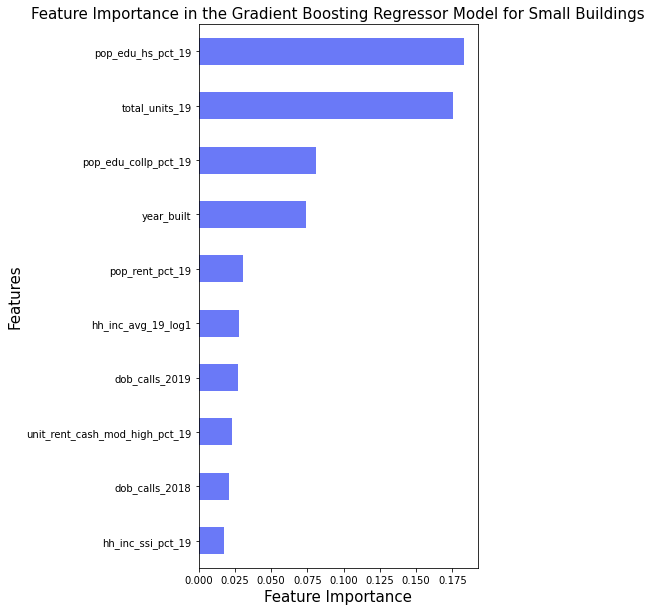

In [52]:
# Get Feature importance data using feature_importances_attribute

plt.figure(figsize=(5,10))
importances = pd.Series(fit_gb_small.best_estimator_.feature_importances_, X_train.columns)
importances.sort_values().tail(10).plot.barh(color = '#6a79f7')
plt.title('Feature Importance in the Gradient Boosting Regressor Model for Small Buildings',fontsize=15)
plt.xlabel('Feature Importance',fontsize = 15)
plt.ylabel('Features',fontsize = 15)
plt.show()


In [53]:
# save prediction on all dataset 

y_hat_gb_small = fit_gb_small.predict(X)
df_copy = df_small.copy()
df_copy['preds_small'] = y_hat_gb_small
df_copy.to_csv('./MLC_SP23/clean_data/df_pred_small.csv',index = False)
df_copy

,bbl,rs_share_diff,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,...,boro_2,boro_3,boro_4,boro_5,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1,preds_small
0,1001350019,0.000000,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,12.897523,0.096864,0.055298,0.002253,0.014341,-0.320175
1,1002350005,-1.000000,6,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,11.803791,0.451849,0.006854,0.016932,0.063120,-0.231679
2,1003500056,-1.000000,4,1920,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,10.907791,0.187639,0.109268,0.056577,0.008282,-0.701275
3,1003860001,0.000000,6,1920,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,11.174328,0.214390,0.125652,0.055910,0.014418,-0.291281
4,1004060001,-0.333333,6,1910,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,11.502635,0.110977,0.031468,0.068586,0.067398,-0.250936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,3007560039,1.000000,6,1911,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,11.428413,0.091405,0.015917,0.024995,0.004735,-0.009135
8098,3009330001,0.833333,6,1920,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,12.173808,0.061499,0.134265,0.026717,0.055102,-0.102570
8099,3010260042,0.833333,6,1931,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,11.785677,0.105547,0.079324,0.028502,0.027192,-0.620084
8100,3023190008,0.500000,6,1910,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,11.865889,0.044610,0.001094,0.049859,0.072142,-0.210616


In [70]:
# mean rs_share_diff prediction by borough
df_pred_small = pd.read_csv("./MLC_SP23/clean_data/df_pred_small.csv", low_memory=False, index_col=[0])
df_pred_small.groupby(['boro_2','boro_3','boro_4','boro_5'])['preds_small'].mean()

boro_2  boro_3  boro_4  boro_5
0       0       0       0        -0.318143
                        1        -0.740878
                1       0        -0.854940
        1       0       0        -0.734290
1       0       0       0        -0.725462
Name: preds_small, dtype: float64

In [75]:
# sum of units by borough

df_pred_small.groupby(['boro_2','boro_3','boro_4','boro_5'])['total_units_19'].sum()

boro_2  boro_3  boro_4  boro_5
0       0       0       0          3885
                        1            86
                1       0         15857
        1       0       0         25178
1       0       0       0          1445
Name: total_units_19, dtype: int64

In [98]:
# change in rs units by borough (multiplication of the two tables above)
df_pred_small.groupby(['boro_2','boro_3','boro_4','boro_5'])['preds_small'].mean()*(df_pred_small.groupby(['boro_2','boro_3','boro_4','boro_5'])['total_units_19'].sum())

boro_2  boro_3  boro_4  boro_5
0       0       0       0         -1235.984790
                        1           -63.715508
                1       0        -13556.786243
        1       0       0        -18487.959601
1       0       0       0         -1048.292152
dtype: float64

In [71]:
# mean rs_share_diff prediction by pop_edu_hs_pct_19
 
df_pred_small['edu_bin'] = pd.cut(df_pred_small['pop_edu_hs_pct_19'], 
                          bins=4, 
                          include_lowest=True,
                          duplicates='drop') 
df_pred_small.groupby('edu_bin')['preds_small'].mean()

edu_bin
(-0.001616, 0.154]   -0.437317
(0.154, 0.308]       -0.798823
(0.308, 0.462]       -0.829291
(0.462, 0.616]       -0.834616
Name: preds_small, dtype: float64

In [76]:
# sum of units by pop_edu_hs_pct

df_pred_small.groupby(['edu_bin'])['total_units_19'].sum()

edu_bin
(-0.001616, 0.154]     8580
(0.154, 0.308]        29098
(0.308, 0.462]         8146
(0.462, 0.616]          627
Name: total_units_19, dtype: int64

In [99]:
# change in rs units by pop_edu_hs_pct (multiplication of the two tables above)
   # ignore the negative sign in the first edu bin. There's no negative value, it's just how pandas chose to bin. 
   # https://pandas.pydata.org/docs/reference/api/pandas.cut.html

df_pred_small.groupby('edu_bin')['preds_small'].mean()*(df_pred_small.groupby(['edu_bin'])['total_units_19'].sum())


edu_bin
(-0.001616, 0.154]    -3752.180495
(0.154, 0.308]       -23244.151645
(0.308, 0.462]        -6755.402400
(0.462, 0.616]         -523.304486
dtype: float64

In [100]:
df_pred_small['pop_edu_hs_pct_19'].describe()

count    8102.000000
mean        0.232597
std         0.096180
min         0.000000
25%         0.178154
50%         0.232332
75%         0.287813
max         0.616303
Name: pop_edu_hs_pct_19, dtype: float64

In [73]:
# mean rs_share_diff prediction by total units
 
df_pred_small['unit_bin'] = pd.cut(df_pred_small['total_units_19'], 
                          bins=5, 
                          include_lowest=True,
                          duplicates='drop') 
df_pred_small.groupby('unit_bin')['preds_small'].mean()

unit_bin
(0.994, 2.0]    0.513205
(2.0, 3.0]     -0.519642
(3.0, 4.0]     -0.821701
(4.0, 5.0]     -0.688143
(5.0, 6.0]     -0.746747
Name: preds_small, dtype: float64

In [77]:
# sum of units by total units in the building

df_pred_small.groupby(['unit_bin'])['total_units_19'].sum()

unit_bin
(0.994, 2.0]      103
(2.0, 3.0]        342
(3.0, 4.0]       2372
(4.0, 5.0]       1820
(5.0, 6.0]      41814
Name: total_units_19, dtype: int64

In [101]:
# change in rs units by total_unit (multiplication of the two tables above)

df_pred_small.groupby('unit_bin')['preds_small'].mean() * (df_pred_small.groupby(['unit_bin'])['total_units_19'].sum())


unit_bin
(0.994, 2.0]       52.860150
(2.0, 3.0]       -177.717651
(3.0, 4.0]      -1949.075061
(4.0, 5.0]      -1252.420489
(5.0, 6.0]     -31224.458360
dtype: float64

### 3. Gradient Boosting Regressor - buildings > 6 units

In [54]:
df_big = df[df['total_units_19'] > 6].reset_index(drop=True)

In [55]:
X = df_big.drop(['rs_share_diff','bbl'], axis = 1)
y = df_big['rs_share_diff']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [57]:
# Fit model

gbr_params = {'n_estimators' : [150,200,250],
            'max_depth'    : [2,4,6],
             }

model_gb = GradientBoostingRegressor()
gr_gb = GridSearchCV(model_gb, param_grid = gbr_params, cv = 4)
fit_gb_big = gr_gb.fit(X_train, y_train)
print(fit_gb.best_estimator_)

GradientBoostingRegressor(max_depth=4, n_estimators=200)


In [58]:
# Test set prediction

y_hat_gb_test_big = fit_gb_big.predict(X_test)
rmse_big = mean_squared_error(y_test, y_hat_gb_test_big, squared=False)

print("RMSE_big: ", rmse_big)

RMSE_big:  0.3271813115701858


/Users/yujinlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


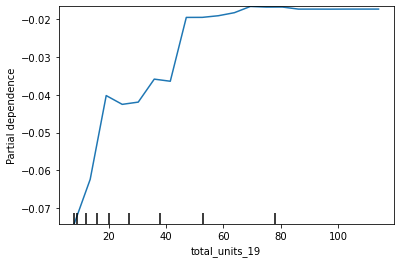

In [59]:
# Path Dependency

features = ['total_units_19']
plot_partial_dependence(fit_gb_big, X_train, features,
                        n_jobs=3, grid_resolution=20)

fig = plt.gcf()


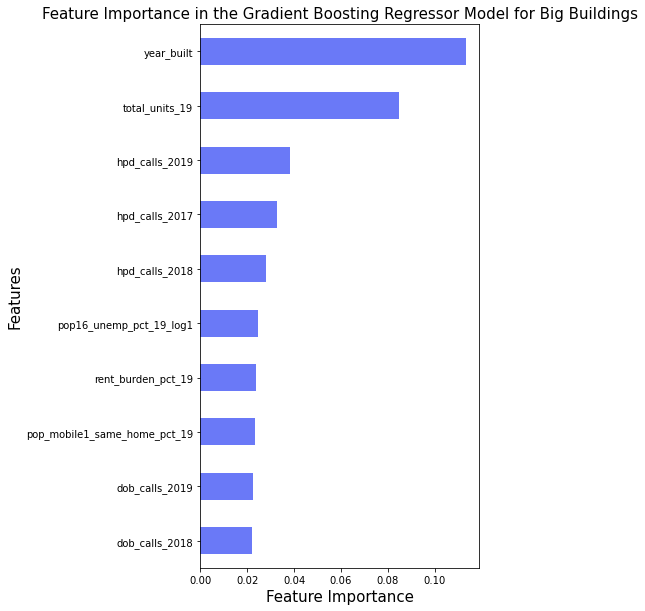

In [60]:
# Get Feature importance data using feature_importances_attribute
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.figure(figsize=(5,10))
importances = pd.Series(fit_gb_big.best_estimator_.feature_importances_, X_train.columns)
importances.sort_values().tail(10).plot.barh(color = '#6a79f7')
plt.title('Feature Importance in the Gradient Boosting Regressor Model for Big Buildings',fontsize=15)
plt.xlabel('Feature Importance',fontsize = 15)
plt.ylabel('Features',fontsize = 15)
plt.show()


In [61]:
# save prediction on all dataset 

y_hat_gb_big = fit_gb_big.predict(X)
df_copy = df_big.copy()
df_copy['preds_big'] = y_hat_gb_big
df_copy.to_csv('./MLC_SP23/clean_data/df_pred_big.csv',index = False)
df_copy

,bbl,rs_share_diff,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,...,boro_2,boro_3,boro_4,boro_5,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1,preds_big
0,1000780047,0.000000,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,12.276639,0.150551,0.018246,0.035008,0.074674,0.238620
1,1001620013,-0.050000,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935,-0.034761
2,1001630024,0.187500,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935,-0.029129
3,1001630033,0.000000,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935,-0.039613
4,1001640049,0.000000,19,1915,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,0,0,10.973689,0.461379,0.096629,0.037102,0.008935,-0.031720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30848,4001360036,1.000000,7,1924,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,11.333896,0.222322,0.007496,0.064376,0.007321,-0.053273
30849,4019390011,1.000000,68,2016,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,10.661933,0.101427,0.055693,0.150251,0.006320,0.636976
30850,4049590008,0.857143,7,1930,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,10.921956,0.648695,0.000000,0.024720,0.000000,0.481872
30851,4052630021,1.000000,47,1929,0.0,2.0,0.0,0.0,0.0,0.0,...,0,0,1,0,11.256711,0.373006,0.021625,0.033609,0.005244,0.081633


In [78]:
# mean rs_share_diff pred by borough

df_pred_big = pd.read_csv("./MLC_SP23/clean_data/df_pred_big.csv", low_memory=False, index_col=[0])
df_pred_big.groupby(['boro_2','boro_3','boro_4','boro_5'])['preds_big'].mean()

boro_2  boro_3  boro_4  boro_5
0       0       0       0        -0.039713
                        1        -0.071671
                1       0        -0.034289
        1       0       0        -0.056442
1       0       0       0        -0.047160
Name: preds_big, dtype: float64

In [79]:
# sum of units by borough

df_pred_big.groupby(['boro_2','boro_3','boro_4','boro_5'])['total_units_19'].sum()

boro_2  boro_3  boro_4  boro_5
0       0       0       0         437539
                        1           9138
                1       0         221202
        1       0       0         277658
1       0       0       0         237725
Name: total_units_19, dtype: int64

In [104]:
# change in rs units by borough

df_pred_big.groupby(['boro_2','boro_3','boro_4','boro_5'])['preds_big'].mean() * (df_pred_big.groupby(['boro_2','boro_3','boro_4','boro_5'])['total_units_19'].sum())

boro_2  boro_3  boro_4  boro_5
0       0       0       0        -17376.070294
                        1          -654.932532
                1       0         -7584.864221
        1       0       0        -15671.503680
1       0       0       0        -11211.104298
dtype: float64

In [82]:
# mean rs_share_diff prediction by year_built
 
df_pred_big['year_bin'] = pd.cut(df_pred_big['year_built'], 
                          bins=4, 
                          include_lowest=True,
                          duplicates='drop') 
df_pred_big.groupby('year_bin')['preds_big'].mean()

year_bin
(1784.765, 1843.5]   -0.092897
(1843.5, 1902.0]     -0.044459
(1902.0, 1960.5]     -0.053819
(1960.5, 2019.0]      0.001805
Name: preds_big, dtype: float64

In [83]:
# sum of units by year_built

df_pred_big.groupby(['year_bin'])['total_units_19'].sum()

year_bin
(1784.765, 1843.5]       974
(1843.5, 1902.0]       73050
(1902.0, 1960.5]      827269
(1960.5, 2019.0]      281969
Name: total_units_19, dtype: int64

In [105]:
# change in rs units by year_built 

df_pred_big.groupby('year_bin')['preds_big'].mean() * (df_pred_big.groupby(['year_bin'])['total_units_19'].sum())

year_bin
(1784.765, 1843.5]      -90.481604
(1843.5, 1902.0]      -3247.696551
(1902.0, 1960.5]     -44522.447950
(1960.5, 2019.0]        508.864601
dtype: float64

In [106]:
# mean rs_share_diff prediction by total units 
 
df_pred_big['unit_bin'] = pd.cut(df_pred_big['total_units_19'], 
                          bins=5,
                          duplicates='drop') 
df_pred_big.groupby('unit_bin')['preds_big'].mean()

unit_bin
(-1.757, 1758.4]   -0.045466
(1758.4, 3509.8]    0.030143
(3509.8, 5261.2]         NaN
(5261.2, 7012.6]         NaN
(7012.6, 8764.0]    0.027571
Name: preds_big, dtype: float64

In [88]:
df_pred_big['total_units_19'].describe() # confirming the min total unit in this dataset is 7

count    30853.000000
mean        38.351603
std         77.948874
min          7.000000
25%         10.000000
50%         20.000000
75%         45.000000
max       8764.000000
Name: total_units_19, dtype: float64

In [107]:
# sum of units by total units in the building

df_pred_big.groupby(['unit_bin'])['total_units_19'].sum()

unit_bin
(-1.757, 1758.4]    1168259
(1758.4, 3509.8]       6239
(3509.8, 5261.2]          0
(5261.2, 7012.6]          0
(7012.6, 8764.0]       8764
Name: total_units_19, dtype: int64

In [108]:
# change in rs unit by year_built

df_pred_big.groupby('unit_bin')['preds_big'].mean() * (df_pred_big.groupby(['unit_bin'])['total_units_19'].sum())

unit_bin
(-1.757, 1758.4]   -53115.976949
(1758.4, 3509.8]      188.064020
(3509.8, 5261.2]             NaN
(5261.2, 7012.6]             NaN
(7012.6, 8764.0]      241.636083
dtype: float64

Text(0.5, 1.0, 'rs_share_diff')

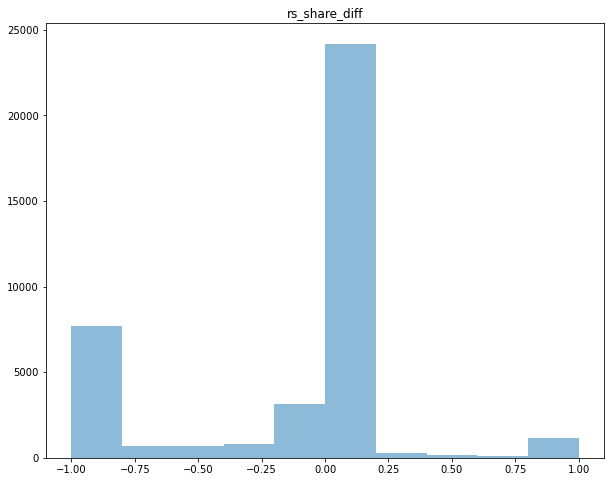

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

fig, axe = plt.subplots(figsize=(10,8))
_ = axe.hist(df['rs_share_diff'], alpha=0.5)
axe.set_title('rs_share_diff')